<a href="https://colab.research.google.com/github/SebastianYanezV/ADA-Informes/blob/main/Informe_9_Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema: Problema del camino más corto

**Entrada:** Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida:** La distancia más corta $dist(s,v)$ para cada vértice $v\in V$ o una declaración indicando que $G$ contiene un ciclo negativo.

El problema que se quiere resolver en este caso, corresponde al problema del camino más corto, el cuál consiste en encontrar la distancia más corta entre el nodo (o vértice) fuente $s\in V$ y cada otro nodo $v\in V$ dentro del grafo dirigido de entrada. Para resolver este problema, se pueden utilizar dos algoritmos dependiendo del contexto de este mismo, por un lado, si se requiere encontrar los caminos más cortos en un grafo que **sólo contiene arcos positivos**, entonces se utiliza el algoritmo de *Dijkstra*, mientras que, si se requiere encontrar los caminos más cortos en un grafo que **puede contener tanto arcos positivos como negativos**, entonces se utiliza el algoritmo de *Bellman-Ford*.

# 2. Dijkstra y Bellman-Ford

## 2.1 Código

Los códigos que se muestran a continuación pertenecen a los algoritmos *Dijktra* y *Bellman-Ford*.

In [116]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [117]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_Dijkstra(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [118]:
import networkx as nx

def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

### 2.1.1 Dijkstra

Lista generada: [(0, 1, 83), (1, 2, -12), (1, 2, 63), (2, 0, 53), (2, 0, 26)]
Distancia más corta a cada vértice desde el nodo fuente (nodo 0):
Al nodo 0 ---> 0
Al nodo 1 ---> 83
Al nodo 2 ---> 146


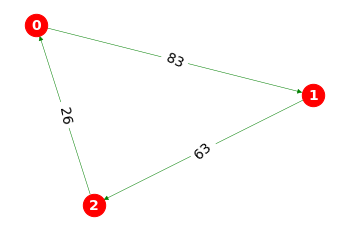

In [119]:
def listT_to_matrix(lista, V):
  edges = len(lista)
  matriz = [[0 for i in range(V)] for j in range(V)]
  
  for node in range(edges):
    for (x, y, peso) in lista:
      matriz[x][y] = peso

  return matriz

def minDistance(V, dis, visitado, verbose = False):
  min = 999999
  min_index = 0

  #Se busca la distancia minima
  for u in range(V):
    if verbose == True: 
      print("-----------------------------------------------------------------------------------")
      print(f"Si dis[{u}] ({dis[u]}) < {min} y visitado[{u}] == False")
    if dis[u] < min and visitado[u] == False:
      min = dis[u]
      min_index = u
      if verbose == True:
        print(f"min = dis[{u}] ({dis[u]})")
        print(f"min_index = {u}")
    else:
      if verbose == True: print(f"No entra al if.")
    
  return min_index

def Dijkstra(lista, matriz, V, s, verbose = False, visualize = True):
  #Se inicilaizan las distancias a cada nodo y se marcan como no visitados
  dis = [999999] * V
  dis[s] = 0
  visitado = [False] * V

  if verbose == True: 
    print(f"Se inicializan las distancias a cada nodo: {dis}.")
    print(f"Se empieza a calcular el camino más corto desde {s} hasta cada otro nodo del grafo.")
 
  for _ in range(V):
    x = minDistance(V, dis, visitado, False)
    visitado[x] = True
    if verbose == True: print(f"Se encuentra la distancia minima {x} y visitado[{x}] se marca como visitado.")
    for y in range(V):
      if verbose == True: 
        print("-----------------------------------------------------------------------------------")
        print(f"Si matriz[{x}][{y}] ({matriz[x][y]}) > 0 y visitado[{y}] == False y dis[{y}] > dis[{x}] + matriz[{x}][{y}]")
      if matriz[x][y] > 0 and visitado[y] == False and dis[y] > dis[x] + matriz[x][y]:
        #Se guarda la menor distancia a cada nodo
        dis[y] = dis[x] + matriz[x][y]
        if verbose == True: print(f"dis[{y}] = dis[{x}] + matriz[{x}][{y}]")
      else:
        if verbose == True: print(f"No entra al if.")
  
  if verbose == True: print("-----------------------------------------------------------------------------------")
  
  if visualize == True:
    digrafo = graph_to_nxdigraph(lista, V)
    pos = nx.spring_layout(digrafo)
    labels = nx.get_edge_attributes(digrafo,'weight')
    nx.draw_networkx_edge_labels(digrafo,pos,edge_labels=labels,font_size=14)
    nx.draw(digrafo,pos, node_color="red", with_labels=True, node_size=500, font_color="white", font_size=14, font_weight="black", width  =0.5, edge_color ="green")

  return dis

a, b = instance_generator_Dijkstra(3)
grafo = listT_to_matrix(a, 3)
print("Lista generada:", a)
caminos = Dijkstra(a, grafo, 3, 0)
print(f"Distancia más corta a cada vértice desde el nodo fuente (nodo 0):")
for i in range(3):
  print(f"Al nodo {i} ---> {caminos[i]}")

### 2.1.2 Bellman-Ford

Lista generada: [(0, 2, 15), (2, 1, 45), (1, 0, 21), (1, 0, 91)]
Distancia más corta a cada vértice desde el nodo fuente (nodo 0):
Al nodo 0 ---> 0
Al nodo 1 ---> 60
Al nodo 2 ---> 15


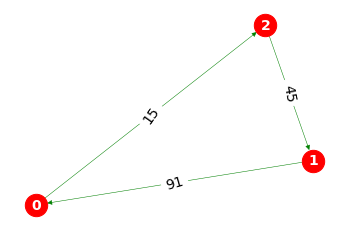

In [121]:
import matplotlib.pyplot as plt

def BellmanFord(lista, V, E, s, verbose = False, visualize = True):
  #Se inicilaizan las distancias a cada nodo
  dis = [999999] * V
  dis[s] = 0
  if verbose == True: 
    print(f"Se inicializan las distancias a cada nodo: {dis}.")
    print(f"Se empieza a calcular el camino más corto desde {s} hasta cada otro nodo del grafo.\n")

  #Se recorren los nodos
  for i in range(V - 1):
    if verbose == True: print("-----------------------------------------------------------------------------------\n")
    #Se recorren los arcos
    for j in range(E):
      #El camino más corto hacia el nodo "v" con i arcos se actualizará si el camino más corto encontrado
      #es menor que la distancia al nodo "v" con i arcos + el peso de ese camino
      if verbose == True: print(f"Si dis[{lista[j][0]}] ({dis[lista[j][0]]}) + lista[{j}][2] ({lista[j][2]}) < dis[{lista[j][1]}] {dis[lista[j][1]]}, entonces:")
      if dis[lista[j][0]] + lista[j][2] < dis[lista[j][1]]:
        if verbose == True: print(f"dis[{lista[j][1]}] ({dis[lista[j][1]]}) = dis[{lista[j][0]}] ({dis[lista[j][0]]}) + lista[{j}][2] ({lista[j][2]})\n")
        dis[lista[j][1]] = dis[lista[j][0]] + lista[j][2]
      else:
        if verbose == True: print(f"dis[{lista[j][0]}] ({dis[lista[j][0]]}) + lista[{j}][2] ({lista[j][2]}) era mayor que dis[{lista[j][1]}] {dis[lista[j][1]]}.\n")

  if verbose == True: 
    print("-----------------------------------------------------------------------------------\n")
    print("Se verfica que no haya ningun ciclo negativo en el grafo.")

  for i in range(E):
    #Se obtiene el nodo origen, nodo final y el peso del arco entre ambos
    x = lista[i][0]
    y = lista[i][1]
    pesoArco = lista[i][2]
    #Se verifica que no hayan ciclos negativos
    if dis[x] != 999999 and dis[x] + pesoArco < dis[y]:
      print("El grafo contiene un ciclo negativo.")
      return

  if verbose == True: 
    print("No hay ningun ciclo negativo.\n")
    print("-----------------------------------------------------------------------------------\n")
    
  if visualize == True:
    grafo = graph_to_nxdigraph(lista, V)
    pos = nx.spring_layout(grafo)
    labels = nx.get_edge_attributes(grafo,'weight')
    nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels,font_size=14)
    nx.draw(grafo,pos, node_color="red", with_labels=True, node_size=500, font_color="white", font_size=14, font_weight="black", width  =0.5, edge_color ="green")

  return dis

a, b = instance_generator(3)
print("Lista generada:", a)
caminos = BellmanFord(a, 3, len(a), 0)
print(f"Distancia más corta a cada vértice desde el nodo fuente (nodo 0):")
for i in range(3):
  print(f"Al nodo {i} ---> {caminos[i]}")

## 2.2 Descripción del algoritmo

### 2.2.1 Descripción de Dijkstra

A continuación se describe el funcionamineto del algoritmo:

1. El algoritmo recibe el grafo en forma de lista, de matriz, su cantidad de nodos y el nodo fuente.

2. Se inicializan las distancias a cada nodo, si el nodo es el nodo fuente, entonces la distanca es 0, sino, la distancia será igual a infinito (999999). Además, se marcan los todos nodos como no visitados.

3. Se empieza a recorrer la matriz (grafo) y se va buscando la distancia mínima del nodo fuente a cada otro nodo. En la matriz, $x$ representa el nodo de partida e $y$ el nodo de llegada y la posición (x, y) representa la menor distancia almacenada hasta el momento.

4. Finalmente, se debe mostrar la distancia mínima de cada camino hacia cada nodo desde el nodo fuente.

### 2.2.2 Descripción de Bellman-Ford

**Sub-estructura óptima:** La sub-estructura óptima de este problema se basa en ir calculando el camino más corto entre el nodo de origen $s\in V$ y cada otro nodo $v\in V$. Para lo anterior, pueden ocurrir dos casos:

1. Si se conoce la cantidad de arcos de la ruta óptima: Se deben calcular los caminos más cortos entre $s$ y un nodo intermedio $w$ y a esos resultados, sumarles la distancia entre $w$ y $v$, para luego quedarse con el resultado menor, el cuál correspondería al camino más corto. 

2. Si no se conoce la cantidad de arcos de la ruta óptima: El camino más corto entre $s$ y $v$ corresponde al camino más corto con $i - 1$ arcos o menos que se encuentre, con $i ≥ 1$.

**Función de recurrencia:** Sea $L_{i,v}$ el largo mínimo de un camino entre $s$ y $v$ con a lo más $i-1$ arcos y ciclos permitidos. Luego, para todo $i\geq 1$ y $v \in V$ se tiene que:

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(Caso 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(Caso 2)}
    	\end{array}
\right\}$

Los sub-problemas de base serían, para todo $v\in V$:

$L_{0,v} =
\left\{
 \begin{array}{cc}
 0 & \text{(Si s = v)} \\
 +∞ & \text{(En otro caso)}
    	\end{array}
\right\}$

A continuación se decribe el funcionamiento del algoritmo.

1. El algoritmo recibe el grafo en forma de lista, su cantidad de nodos, arcos y el nodo fuente.

2. Se inicializan las distancias a cada nodo, si el nodo es el nodo fuente, entonces la distanca es 0, sino, la distancia será igual a infinito (999999).

3. Se empieza a recorrer la lista (grafo) y se utiliza la función de recurrencia mostrada anteriormente para ir buscando la distancia mínima del nodo fuente a cada otro nodo.

4. Luego de calcular cada camino más corto, se debe verificar que no exista ningún ciclo negativo en el grafo, en caso de existir, se debe mostrar un mensaje por pantalla.

5. Finalmente, si no existía ningún ciclo negativo, se debe mostrar la distancia mínima de cada camino hacia cada nodo desde el nodo fuente.

## 2.3 Ejemplo

### 2.3.1 Ejemplo Dijkstra

Se tiene la siguiente lista:

[(0, 1, 51), (2, 0, 98), (1, 2, 19)]

En pocas palabras, lo que el algoritmo de *Dijkstra* debe hacer es buscar el camino más corto hasta cada nodo desde un nodo fuente, en este caso, el nodo 0.

1. Revisa los caminos más cortos hasta el nodo 0, es el mismo nodo, por lo que el largo del camino es 0 y no hay ninguno menor.

2. Busca el camino más corto hasta el nodo 1, el cuál es igual a 51, ya que no hay otros nodos.

3. Busca el camino más corto hasta el nodo 2, el cuál es 70, ya que este camino está formado por el camino de 0 a 1 y el de 1 a 2, con pesos de 51 y 19 respectivamente.

4. Finalmente, se tiene que:

  Distancia más corta a cada vértice desde el nodo fuente (nodo 0):

  Al nodo 0 ---> 0

  Al nodo 1 ---> 51

  Al nodo 2 ---> 70

### 2.3.2 Ejemplo Bellman-Ford

Se ingresa el siguiente grafo en forma de lista, junto a sus nodos, arcos y nodo fuente:

lista = [(1, 2, 48), (2, 0, 43), (0, 1, 93), (0, 1, 55)]

V = 3

E = 4

Nodo Fuente = 0

G es de la forma (a, b, c), donde a y b representan el nodo de partida y de llegada respectivamente y donde c es igual al peso del arco entre ellos.

1. Se inicializan todas las distancias en infinito o 0, si es otro nodo o el fuente, respectivamente:

  dis[0, 999999, 999999]

2. Se empieza a buscar el camino con menor distancia desde $s$ a cada otro nodo del grafo:

  2.1 Se recorre de 0 a 2 (i) y de 0 a 4 (j).

  2.2 Si dis[lista[0][0]] + lista[0][2] < dis[lista[0][1]], lo que es igual a: 
  
  Si dis[1] + 48 < dis[2], lo que es igual a: 
  
  Si 999999 + 48 < 999999, entonces:
    
  dis[2] = dis[1] + lista[0][2]

  dis[2] = 999999 + 48

  Pero eso no es verdad, por lo que se hace la siguiente comparación.

  2.3 Si dis[lista[1][0]] + lista[1][2] < dis[lista[1][1]], lo que es igual a:

  Si dis[2] + 43 < dis[0], lo que es igual a:

  Si 999999 + 43 < 0, entonces:

  dis[0] = dis[2] + 43

  dis[0] = 999999 + 43

  Pero eso no es verdad, por lo que se hace la siguiente comparación.

3. Se realiza el procedimiento anterior hasta encontrar cada camino más corto desde $s$ hasta cada otro nodo del grafo.

4. Finalmente, se tiene que:

  Distancia más corta a cada vértice desde el nodo fuente (nodo 0):

  Al nodo 0 ---> 0

  Al nodo 1 ---> 55

  Al nodo 2 ---> 103



## 2.4 Ejecución del algoritmo paso a paso

### 2.4.1 Dijkstra

In [ ]:
a, b = instance_generator_Dijkstra(3)
grafo = listT_to_matrix(a, 3)
print("Lista generada:", a)
caminos = Dijkstra(a, grafo, 3, 0, True, False)
print(f"Distancia más corta a cada vértice desde el nodo fuente (nodo 0):")
for i in range(3):
  print(f"Al nodo {i} ---> {caminos[i]}")

Lista generada: [(0, 1, 16), (1, 2, 56), (2, 0, 80)]
Se inicializan las distancias a cada nodo: [0, 999999, 999999].
Se empieza a calcular el camino más corto desde 0 hasta cada otro nodo del grafo.
-----------------------------------------------------------------------------------
Si dis[0] (0) < 999999 y visitado[0] == False
min = dis[0] (0)
min_index = 0
-----------------------------------------------------------------------------------
Si dis[1] (999999) < 0 y visitado[1] == False
No entra al if.
-----------------------------------------------------------------------------------
Si dis[2] (999999) < 0 y visitado[2] == False
No entra al if.
Se encuentra la distancia minima 0 y visitado[0] se marca como visitado.
-----------------------------------------------------------------------------------
Si matriz[0][0] (0) > 0 y visitado[0] == False y dis[0] > dis[0] + matriz[0][0]
No entra al if.
-----------------------------------------------------------------------------------
Si matriz[0

### 2.4.2 Bellman-Ford

In [ ]:
a, b = instance_generator(3)
print("Lista generada:", a)
caminos = BellmanFord(a, 3, len(a), 0, True, False)
print(f"Distancia más corta a cada vértice desde el nodo fuente (nodo 0):")
for i in range(3):
  print(f"Al nodo {i} ---> {caminos[i]}")

Lista generada: [(0, 2, 20), (2, 1, 52), (1, 0, 87), (1, 0, 100)]
Se inicializan las distancias a cada nodo: [0, 999999, 999999].
Se empieza a calcular el camino más corto desde 0 hasta cada otro nodo del grafo.

-----------------------------------------------------------------------------------

Si dis[0] (0) + lista[0][2] (20) < dis[2] 999999, entonces:
dis[2] (999999) = dis[0] (0) + lista[0][2] (20)

Si dis[2] (20) + lista[1][2] (52) < dis[1] 999999, entonces:
dis[1] (999999) = dis[2] (20) + lista[1][2] (52)

Si dis[1] (72) + lista[2][2] (87) < dis[0] 0, entonces:
dis[1] (72) + lista[2][2] (87) era mayor que dis[0] 0.

Si dis[1] (72) + lista[3][2] (100) < dis[0] 0, entonces:
dis[1] (72) + lista[3][2] (100) era mayor que dis[0] 0.

-----------------------------------------------------------------------------------

Si dis[0] (0) + lista[0][2] (20) < dis[2] 20, entonces:
dis[0] (0) + lista[0][2] (20) era mayor que dis[2] 20.

Si dis[2] (20) + lista[1][2] (52) < dis[1] 72, entonces:
di

# 3. Tiempo de ejecución

## 3.1 Dijkstra

### Teorema: tiempo de ejecución

El algoritmo de *Dijkstra* tiene un tiempo de ejecución de $O(V^2)$.

### Prueba del teorema

El teorema anterior se puede probar al analizar los procedimientos realizados por el algoritmo en cada paso de este. En primer lugar, inicializar las distancias a cada nodo tiene una complejidad de $O(V)$, luego, para inicializar el arreglo de visitados también se necesita un tiempo de $O(V)$, para encontrar el camino más corto desde el nodo fuente $s$ a cada otro nodo del grafo, se utiliza un ciclo anidado de $O(V^2)$. También, la función *minDistance* tiene un tiempo de ejecución de $O(V)$.

Luego de calcular el tiempo de ejecución de cada paso del algoritmo por separado, se tiene que:

$T(n) = O(V) + O(V) + O(V^2) + O(V) + O(V)$

Lo anterior ayuda a concluir que el tiempo de ejecución del algoritmo de *Dijkstra* efectivamente es de $O(V^2)$, por lo que se puede concluir que el teorema del tiempo de ejecución es verdadero.

## 3.2 Bellman-Ford

### Teorema: tiempo de ejecución

El algoritmo de *Bellman-Ford* tiene un tiempo de ejecución de $O(VE)$.

### Prueba del teorema

El teorema anterior se puede probar al analizar los procedimientos realizados por el algoritmo en cada paso de este. En primer lugar, inicializar las distancias a cada nodo tiene una complejidad de $O(V)$, luego, para encontrar el camino más corto desde el nodo fuente $s$ a cada otro nodo del grafo, se utiliza un ciclo anidado de $O(VE)$. En tercer lugar, el verificar que no hayan ciclos negativos, demora un tiempo de $O(E)$. 

Luego de calcular el tiempo de ejecución de cada paso del algoritmo por separado, se tiene que:

$T(n) = O(V) + O(VE) + O(E) + O(V)$

Lo anterior ayuda a concluir que el tiempo de ejecución del algoritmo *Bellman-Ford* efectivamente es de $O(VE)$, por lo que se puede concluir que el teorema del tiempo de ejecución es verdadero.

# 4. Correctitud Bellman-Ford

## Teorema: correctitud del algoritmo Bellman-Ford

El algoritmo *Bellman-Ford* recibe un grafo en forma de lista, su cantidad de nodos, arcos y un nodo $s$ que se usará como nodo fuente y retorna una lista con las distancias de los caminos más cortos desde $s$ hasta cada otro nodo del grafo.

## Prueba del teorema

Para probar el teorema anterior, se utilizará inducción matemática basándose en la siguiente hipótesis.

"En la i-ésima iteración del algoritmo, la distancia de $s$ a cada nodo $v$ separado como máximo por i arcos es igual a la distancia del camino más corto."

**Caso base (n = 1)**

Si el grafo ingresado sólo posee un único nodo, entonces la lista de distancias retornadas también tendrá un único valor, el cuál será igual a 0, ya que la distancia del nodo fuente $s$ a si mismo, es igual a 0.

**Paso inductivo (n > 1)**

Al comienzo de la iteración i + 1, la distancia actual de $s$ a $v$, corresponde a la distancia del camino más corto con máximo i arcos. Sin embargo, al considerar un arco adicional, podría existir un nuevo valor que minimice esta distancia. Por lo tanto, existen dos casos posibles:

1. El camino más corto de $s$ a $v$ está formado por i arcos o menos. En este caso, ningún camino de $s$ a $v$ formado exactamente por i + 1 arcos minimizará la distancia, por lo tanto, se mantiene el valor de la iteración anterior.

2. El camino más corto de $s$ a $v$ está formado exactamente por i + 1 arcos. Para este caso, consideremos un nodo $w$ predecesor de $v$, tal que el camino de $s$ a $w$ está formado por i arcos. Por inducción, sabemos que la distancia al nodo $w$ es óptima, luego, al sumar este valor con el peso del arco (w, v) se obtendrá una nueva distancia para $v$. Como en cada iteración se recorren todos los arcos del grafo, sabemos que uno de estos arcos (w, v) será el que minimice la distancia a $v$.

**Correctitud**

Finalmente, como el caso base y paso inductivo son correctos, y sabiedo que la sub-estructura óptima del problema permite saber que todos los caminos almacenados serán los más cortos, se concluye que el teorema de correctitud del algoritmo es correcto, por lo que el algoritmo también lo es.

# 5. Experimentos

## 5.1 Bellman-Ford (media de tiempo de ejecución v/s tiempo de ejecución teórico)

En el gráfico que se muestra a continuación se visualizan los tiempos de ejecución del algoritmo Bellman-Ford en función del tamaño del problema para problemas generados aleatoriamente de tamaños entre 5 y 100. Estos problemas se generan utilizando el generador de instancias.

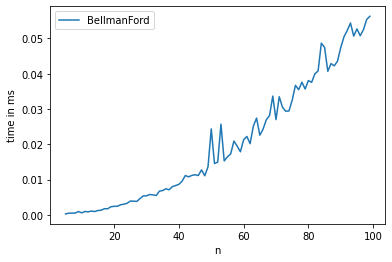

In [169]:
import matplotlib.pyplot as plt
import math
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,100):

  a, b = instance_generator(n)

  t = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({a}, {n}, {len(a)}, {b}, {False}, {False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["BellmanFord"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Cómo se puede ver en el gráfico anterior, el algoritmo tiene un crecimiento exponencial, por lo que el resultado obtenido en el experimento debería coincidir con el tiempo de ejecución teórico esperado del algoritmo, debido a que este es de $O(VE)$.

## 5.2 Dijkstra v/s Bellman-Ford (tiempo de ejecución)

En el gráfico que se muestra a continuación se visualizan los tiempos de ejecución de los algoritmos *Bellman-Ford* y *Dijkstra* en función del tamaño del problema para problemas generados aleatoriamente de tamaños entre 5 y 100. Estos problemas se generan utilizando el generador de instancias.

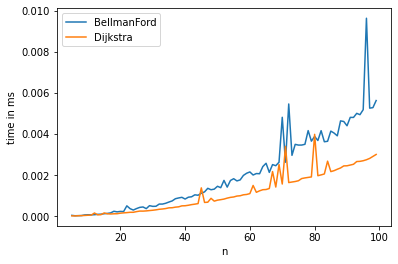

In [ ]:
import matplotlib.pyplot as plt
import math
import datetime
from timeit import repeat

x=[]; y=[]
z=[]; w=[]

for n in range(5,100):

  a, b = instance_generator(n)

  c, d = instance_generator_Dijkstra(n)
  matriz = listT_to_matrix(c, n)

  t = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({a}, {n}, {len(a)}, {b}, {False}, {False})", repeat=1, number=1)
  t2 = repeat(setup="from __main__ import Dijkstra", stmt=f"Dijkstra({c}, {matriz}, {n}, {d}, {False}, {False})", repeat=1, number=1)

  x.append(n)
  y.append(t)

  z.append(n)
  w.append(t2)


plt.plot(x,y)
plt.plot(z,w)
plt.legend(["BellmanFord", "Dijkstra"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Como se puede notar en el gráfico anterior, se puede ver que el algoritmo de *Dijkstra* tiene un mejor tiempo de ejecución que *Bellman-Ford*, ya que $O(V^2)$ es menor que $O(VE)$. Además, estos resultados también se podrían deber a que salieron pocos grafos con ciclos negativos, por lo que *Dijkstra* funcionaría mejor en estos casos.